<a href="https://colab.research.google.com/github/Eliane-orlandin/PrograMaria/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Este projeto tem como objetivo analisar dados de profissionais da área de tecnologia com foco em identificar os principais fatores que influenciam os salários desses trabalhadores. A análise foi realizada a partir de um conjunto de dados extraído de uma pesquisa aplicada com profissionais atuantes no setor, contendo informações sobre gênero, raça, experiência, escolaridade, setor de atuação, localização geográfica, número de funcionários da empresa, entre outros.

A proposta envolve a preparação e limpeza dos dados, a transformação de variáveis categóricas em variáveis numéricas por meio de codificação (one-hot encoding) e a padronização dos dados para aplicação de um modelo de regressão linear. A regressão foi utilizada para prever os salários com base nas variáveis explicativas disponíveis, e os resultados foram avaliados com métricas como erro médio absoluto (MAE), erro quadrático médio (MSE) e coeficiente de determinação (R²).

Além disso, a análise dos coeficientes do modelo permite entender a importância relativa de cada atributo na determinação do salário, contribuindo para discussões sobre desigualdade, oportunidades e valorização profissional na área de dados.

## Importações

In [50]:
import pandas as pd # Importa a biblioteca pandas para manipulação de dados
from sklearn.model_selection import train_test_split # Importa função para dividir os dados em treino e teste
from sklearn.preprocessing import StandardScaler # Importa o escalonador de dados
from sklearn.linear_model import LinearRegression # Importa o modelo de Regressão Linear
import matplotlib.pyplot as plt # Importa biblioteca de visualização
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Importa métricas de avaliação


In [51]:
# Lê o arquivo Excel contendo os dados da pesquisa
dados = pd.read_excel('/content/drive/MyDrive/ProgaMaria/analise_dados_mod7.xlsx')

In [52]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [53]:
dados.columns


Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

## Filtragem de dados: apenas empregados CLT e limpeza de etnias

In [54]:
# Exibe a contagem de respostas para a coluna de situação de trabalho
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [55]:
# Filtra apenas pessoas que estão empregadas com carteira assinada (CLT)
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)'].copy()

In [56]:
# Exibe novamente a contagem para confirmar o filtro
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [57]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [58]:
# Define as categorias de raça/cor que serão removidas do conjunto de dados
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [59]:
# Remove as linhas com as categorias definidas acima e faz uma cópia dos dados
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)].copy()

In [60]:
# Cria uma nova coluna que marca como 1 quem não é branco e 0 quem é branco
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if  x != 'Branca' else 0)

## Transformação de variáveis: experiência e número de funcionários

In [61]:
# Exibe a contagem de tempo de experiência na área de dados
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [62]:
# Extrai apenas o número (em anos) de experiência da string
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [63]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [64]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [65]:
# Remove os pontos da string de número de funcionários (para evitar problemas de conversão)
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

In [66]:
# Extrai apenas o número da string de número de funcionários
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [67]:
# Exibe a contagem dos valores extraídos de número de funcionários (inclusive os faltantes)
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [68]:
# Exibe a contagem de valores extraídos de tempo de experiência (inclusive os faltantes)
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [69]:
# Preenche valores nulos em TEMPO_EXPERIENCIA com 0
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

## Variável de insatisfação com a empresa

In [70]:
# Exibe os motivos de insatisfação informados
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()


,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
"O clima de trabalho/ambiente não é bom, Não tenho uma boa relação com meu líder/gestor, Gostaria de receber mais benefícios",1
Falta de organização nos processos internos,1
"Gostaria de receber mais benefícios, O clima de trabalho/ambiente não é bom, Falta de oportunidade de crescimento no emprego atual",1


In [71]:
# Cria uma nova coluna chamada INSATISFACAO com valor padrão 0
dados['INSATISFACAO'] = 0

In [72]:
# Marca 1 na coluna INSATISFACAO se a pessoa indicou "Salário" como motivo
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [73]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


## Codificação do nível de ensino

In [74]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [75]:
# Converte os níveis de ensino em valores numéricos ordenados
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x== 'Não tenho graduação formal' else
                                         1 if x== 'Estudante de Graduação' else
                                         2 if x== 'Graduação/Bacharelado' else
                                         3 if x== 'Pós-Graduação' else
                                         4 if x== 'Mestrado' else
                                         5 if x== 'Doutorado ou Phd' else -1)

## Seleção de variáveis e dummies

In [76]:
# Mantém apenas as colunas relevantes para o modelo
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]

In [77]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [78]:
# Converte variáveis categóricas em variáveis dummies (binárias), ignorando a primeira categoria para evitar multicolinearidade
dados = pd.get_dummies(dados, columns=['GENERO', 'SETOR','NOVO_NIVEL','REGIAO ONDE MORA' ], drop_first=True)

## Separação entre variáveis independentes e alvo

In [79]:
# Separa as variáveis independentes (X) da variável alvo (y)
X = dados.drop('SALARIO', axis=1)
y = dados['SALARIO']

## Separação em dados de treino e teste

In [80]:
# Divide os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Padronização dos dados

In [81]:
scaler = StandardScaler()
# Aplica padronização (média 0, desvio 1) aos dados de treino
X_train_scaled = scaler.fit_transform(X_train)
# Aplica a mesma transformação aos dados de teste
X_test_scaled = scaler.fit_transform(X_test)

## Treinamento do modelo de regressão linear


In [82]:
model = LinearRegression()

In [83]:
# Treina o modelo com os dados escalonados de treino
model.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# Faz previsões com os dados de teste
y_pred = model.predict(X_test_scaled)

## Avaliação do modelo

In [85]:
# Calcula o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)

In [86]:
mse

23901987.04528664

In [87]:
# Calcula o erro absoluto médio
mae = mean_absolute_error(y_test, y_pred)

In [88]:
mae

3368.6206910812343

In [89]:
# Calcula o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)

In [90]:
r2

0.5123257949806013

## Visualização dos resultados: Dispersão dos valores reais vs previstos

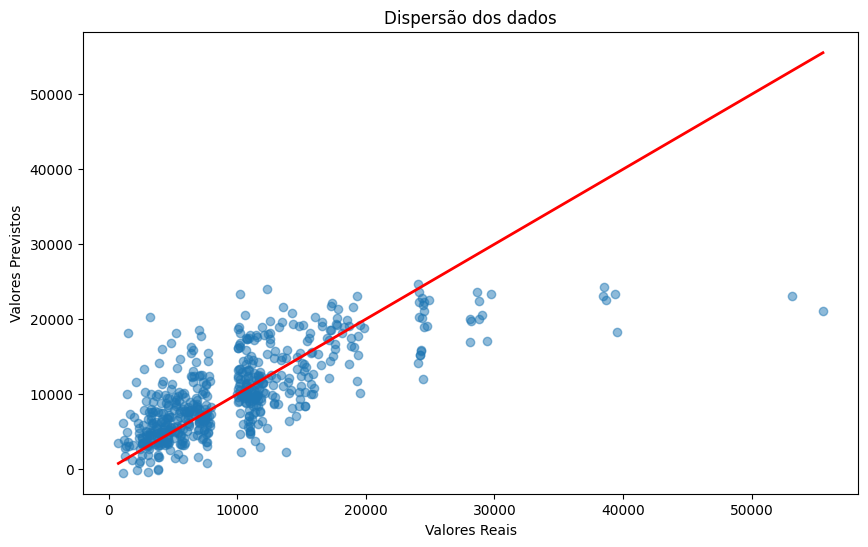

In [91]:
# Cria um gráfico de dispersão entre os valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Dispersão dos dados')
#plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linewidth=2, color='red') #linestyle='--'
plt.show()

## Visualização dos coeficientes do modelo

In [92]:
# Captura os nomes das colunas usadas como preditoras
nomes_atributos = X_train.columns

In [93]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [94]:
# Cria um DataFrame com os coeficientes da regressão linear
coefs = pd.DataFrame(model.coef_, index=nomes_atributos, columns=['Coeficientes'])

In [95]:
# Ordena os coeficientes do maior para o menor
coefs = coefs.sort_values(by = 'Coeficientes', ascending=False)

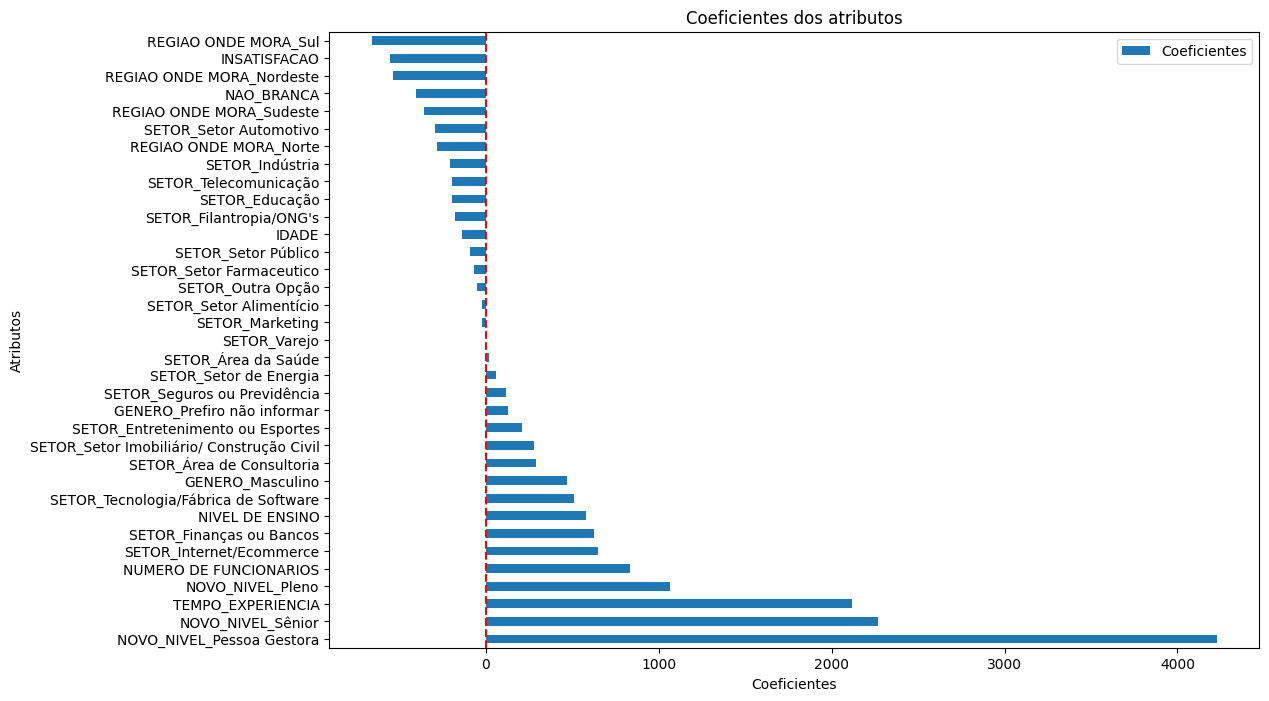

In [96]:
# Plota os coeficientes como gráfico de barras horizontais
coefs.plot.barh(figsize=(12, 8))
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Coeficientes')
plt.ylabel('Atributos')
plt.title('Coeficientes dos atributos')
plt.show()